In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.helper_funcs import convert_dtypes, perc_estimator

sns.set()
%load_ext lab_black

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE, figsize=(8, 8))  # fontsize of the figure title

# Columns:

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "salary_class",
]
col_dict = {}

In [3]:
df = pd.read_csv("../data/raw/adult.data", header=None, names=columns)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary_class    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Salary

In [7]:
col_dict["salary_class"] = {"notes": "", "type": int}

In [8]:
df["salary_class"] = df.salary_class.replace(" <=50K", 0).replace(" >50K", 1)

In [9]:
df.groupby("salary_class").agg([np.mean, np.std])

age                   fnlwgt                education_num  \
                   mean        std          mean            std          mean   
salary_class                                                                    
0             36.783738  14.020088  190340.86517  106482.271195      9.595065   
1             44.249841  10.519028  188005.00000  102541.775472     11.611657   

                       capital_gain               capital_loss              \
                   std         mean           std         mean         std   
salary_class                                                                 
0             2.436147   148.752468    963.139307    53.142921  310.755769   
1             2.385129  4006.142456  14570.378951   195.001530  595.487574   

             hours_per_week             
                       mean        std  
salary_class                            
0                 38.840210  12.318995  
1                 45.473026  11.012971

In [10]:
def cat_eda(df, col, **kwargs):

    ax = sns.countplot(df[col], hue=df["salary_class"], **kwargs)
    plt.xticks(rotation=90)

    perc = df[[col, "salary_class"]].groupby(col).mean()

    return ax, perc.sort_values("salary_class", ascending=False)

In [81]:
df.salary_class.value_counts() / df.shape[0] * 100

0    75.919044
1    24.080956
Name: salary_class, dtype: float64

In [83]:
df.salary_class.value_counts()[0] / df.salary_class.value_counts()[1]

3.152659099604642

# Age

In [12]:
col_dict["age"] = {"notes": "OK", "type": int}
col_dict

{'salary_class': {'notes': '', 'type': int},
 'age': {'notes': 'OK', 'type': int}}

In [13]:
df.age

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

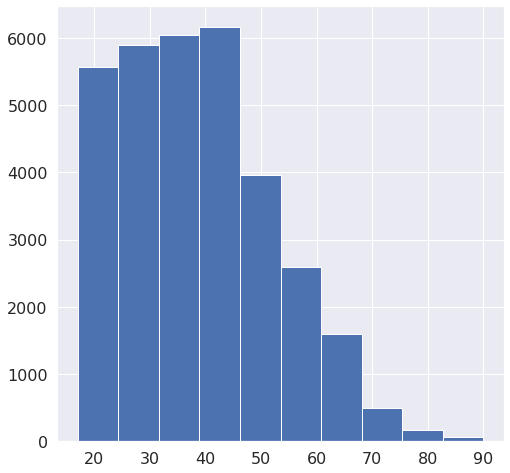

In [14]:
df.age.hist(histtype="bar")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8129965250>,
      salary_class
 age              
 50       0.433555
 54       0.416867
 79       0.409091
 53       0.407328
 47       0.406780
 ..            ...
 18       0.000000
 85       0.000000
 82       0.000000
 20       0.000000
 17       0.000000
 
 [73 rows x 1 columns])

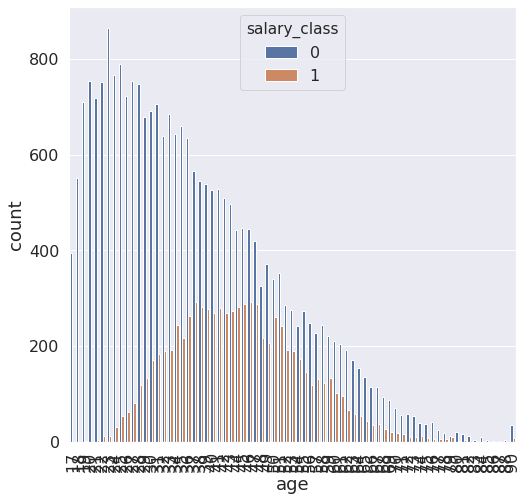

In [15]:
cat_eda(df, "age")

# Workclass

In [16]:
col_dict["workclass"] = {"notes": "70% private, 5.7% unkown(?)", "type": "category"}

In [17]:
df.workclass

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

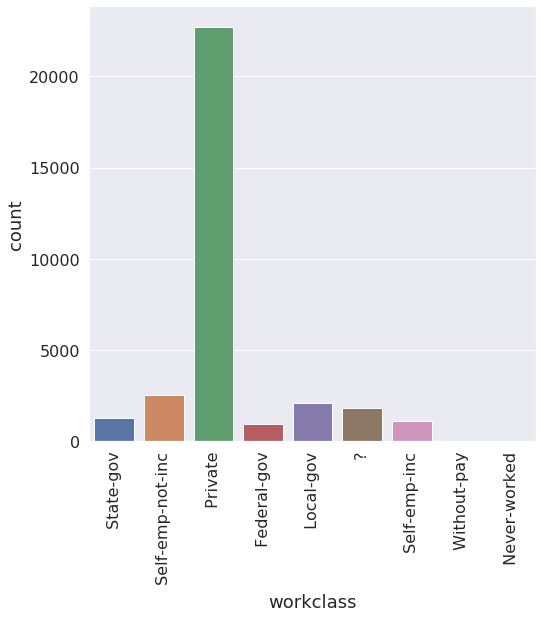

In [18]:
ax = sns.countplot(df.workclass)
plt.xticks(rotation=90)

In [19]:
pd.concat(
    [df.workclass.value_counts(), df.workclass.value_counts(normalize=True) * 100],
    axis=1,
)

,workclass,workclass
Private,22696,69.703019
Self-emp-not-inc,2541,7.803814
Local-gov,2093,6.427935
?,1836,5.638647
State-gov,1298,3.986364
Self-emp-inc,1116,3.427413
Federal-gov,960,2.948312
Without-pay,14,0.042996
Never-worked,7,0.021498


(<matplotlib.axes._subplots.AxesSubplot at 0x7f812a2eb810>,
                    salary_class
 workclass                      
  Self-emp-inc          0.557348
  Federal-gov           0.386458
  Local-gov             0.294792
  Self-emp-not-inc      0.284927
  State-gov             0.271957
  Private               0.218673
  ?                     0.104031
  Never-worked          0.000000
  Without-pay           0.000000)

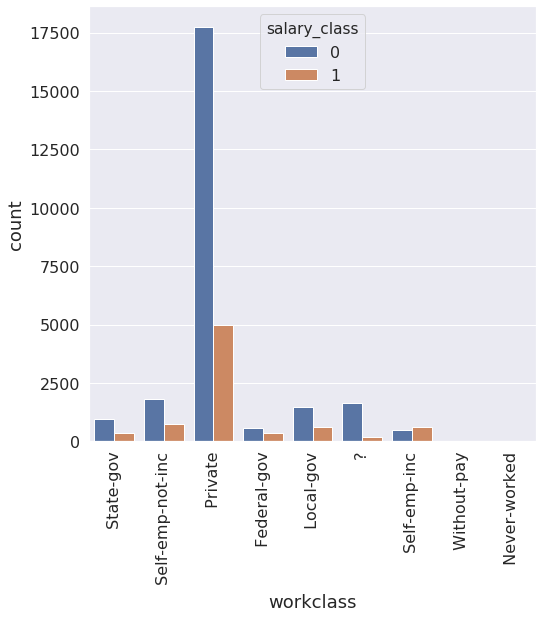

In [20]:
cat_eda(df, "workclass")

# fnlwgt
## What is this??

In [21]:
col_dict["fnlwgt"] = {
    "notes": "Number of people per row? Need to do some more research on this",
    "type": int,
}

In [22]:
df.fnlwgt

0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32561, dtype: int64

Text(0, 0.5, 'fnlwgt')

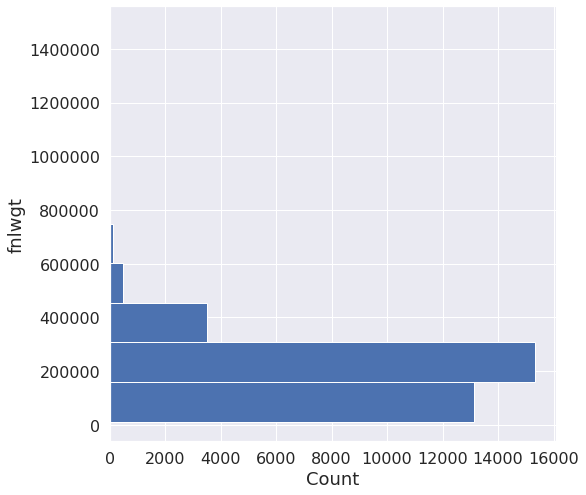

In [23]:
ax = df.fnlwgt.hist(orientation="horizontal")
ax.set_xlabel("Count")
ax.set_ylabel("fnlwgt")

# Education

In [24]:
col_dict["education"] = {
    "notes": "This is an ordinal column and the order may be important.",
    "type": "category",
}
education_order = [
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Some-college",
    "Assoc-voc",
    "Assoc-acdm",
    "Bachelors",
    "Masters",
    "Prof-school",
    "Doctorate",
]
edu_mapper = dict(zip(education_order, range(len(education_order))))

In [25]:
df["education"] = df.education.str.strip()

In [26]:
sorter = df.education.map(edu_mapper)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

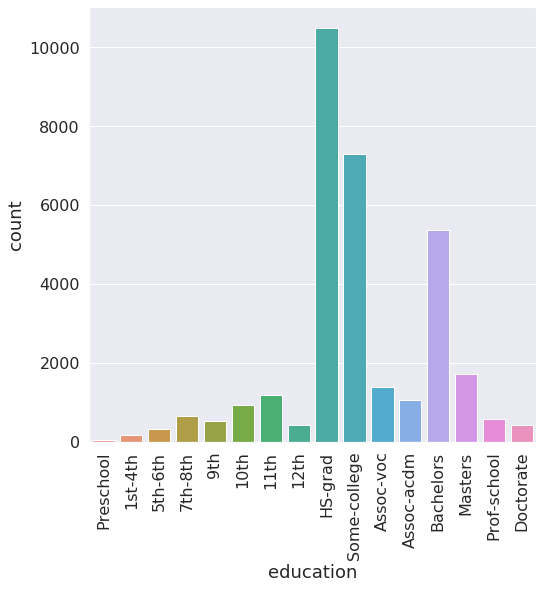

In [27]:
ax = sns.countplot(df.education, orient="h", order=education_order)
plt.xticks(rotation=90)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8125520f90>,
               salary_class
 education                 
 Doctorate         0.740920
 Prof-school       0.734375
 Masters           0.556587
 Bachelors         0.414753
 Assoc-voc         0.261216
 Assoc-acdm        0.248360
 Some-college      0.190235
 HS-grad           0.159509
 12th              0.076212
 10th              0.066452
 7th-8th           0.061920
 9th               0.052529
 11th              0.051064
 5th-6th           0.048048
 1st-4th           0.035714
 Preschool         0.000000)

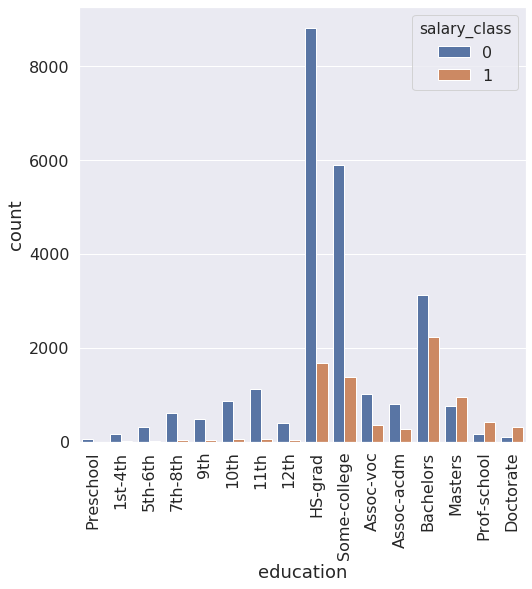

In [28]:
cat_eda(df, "education", order=education_order)

# Education Number - Years of education

In [29]:
col_dict["education_num"] = {"note": "Copy of `education`", "type": int}

In [30]:
df.education_num

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education_num, Length: 32561, dtype: int64

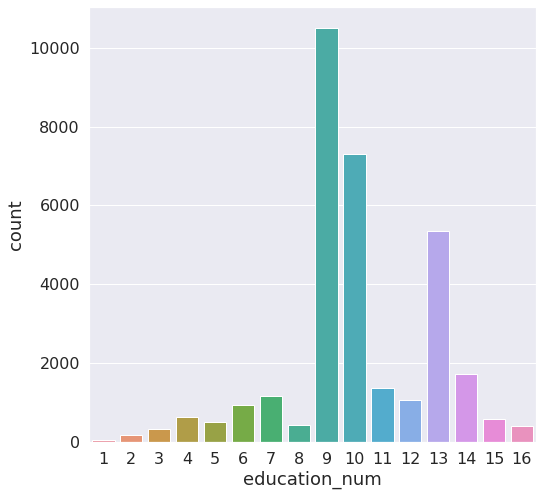

In [31]:
sns.countplot(df.education_num)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8125162b10>,
                salary_class
 education_num              
 16                 0.740920
 15                 0.734375
 14                 0.556587
 13                 0.414753
 11                 0.261216
 12                 0.248360
 10                 0.190235
 9                  0.159509
 8                  0.076212
 6                  0.066452
 4                  0.061920
 5                  0.052529
 7                  0.051064
 3                  0.048048
 2                  0.035714
 1                  0.000000)

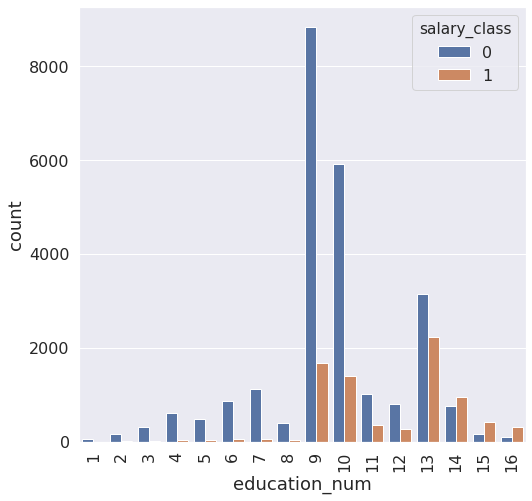

In [32]:
cat_eda(df, "education_num")

# Marital Status

In [33]:
col_dict["marital_status"] = {
    "note": "Looks like Married - Not Married will be a good feature. Include Married-spouse-absent in not married",
    "type": "category",
}

In [34]:
df.marital_status

0              Never-married
1         Married-civ-spouse
2                   Divorced
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32556     Married-civ-spouse
32557     Married-civ-spouse
32558                Widowed
32559          Never-married
32560     Married-civ-spouse
Name: marital_status, Length: 32561, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

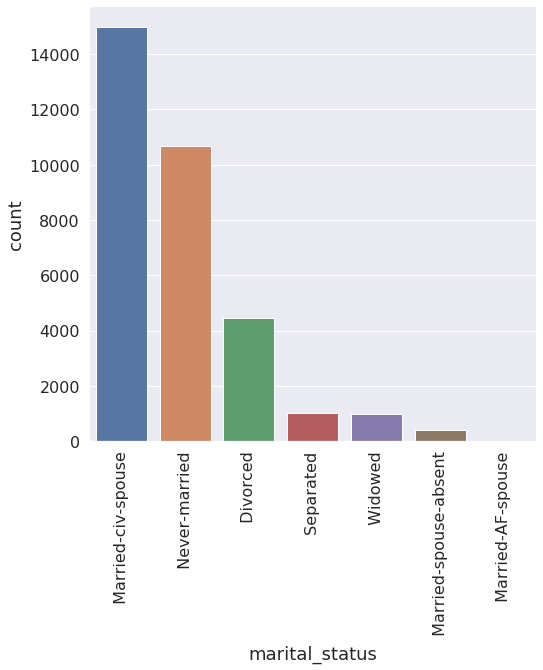

In [35]:
sns.countplot(df.marital_status, order=df.marital_status.value_counts().index)
plt.xticks(rotation=90)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8124f6d650>,
                         salary_class
 marital_status                      
  Married-civ-spouse         0.446848
  Married-AF-spouse          0.434783
  Divorced                   0.104209
  Widowed                    0.085599
  Married-spouse-absent      0.081340
  Separated                  0.064390
  Never-married              0.045961)

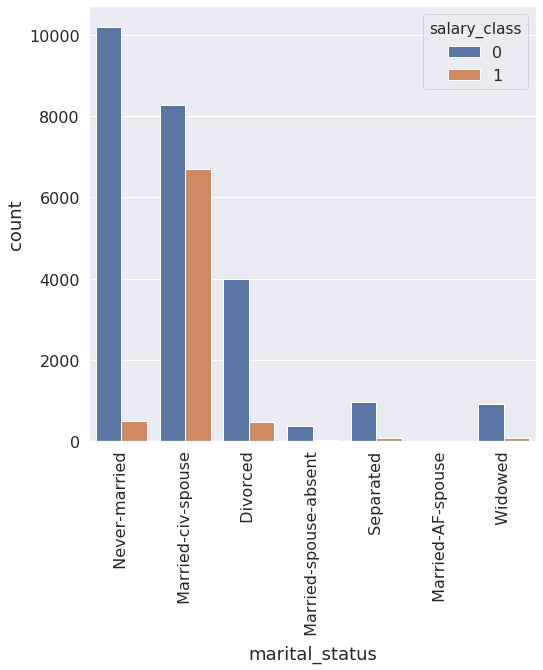

In [36]:
cat_eda(df, "marital_status")

# Occupation

In [ ]:
cols_dict['occupation'] = {'type':'category'}

In [37]:
df.occupation

0              Adm-clerical
1           Exec-managerial
2         Handlers-cleaners
3         Handlers-cleaners
4            Prof-specialty
                ...        
32556          Tech-support
32557     Machine-op-inspct
32558          Adm-clerical
32559          Adm-clerical
32560       Exec-managerial
Name: occupation, Length: 32561, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

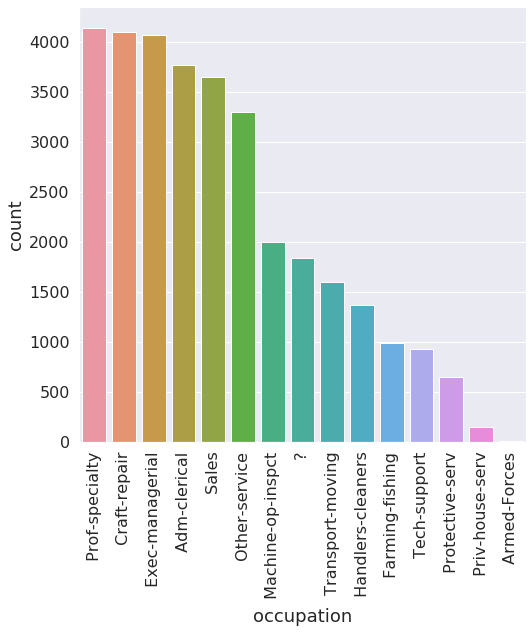

In [38]:
sns.countplot(df.occupation, order=df.occupation.value_counts().index)
plt.xticks(rotation=90)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8125024510>,
                     salary_class
 occupation                      
  Exec-managerial        0.484014
  Prof-specialty         0.449034
  Protective-serv        0.325116
  Tech-support           0.304957
  Sales                  0.269315
  Craft-repair           0.226641
  Transport-moving       0.200376
  Adm-clerical           0.134483
  Machine-op-inspct      0.124875
  Farming-fishing        0.115694
  Armed-Forces           0.111111
  ?                      0.103635
  Handlers-cleaners      0.062774
  Other-service          0.041578
  Priv-house-serv        0.006711)

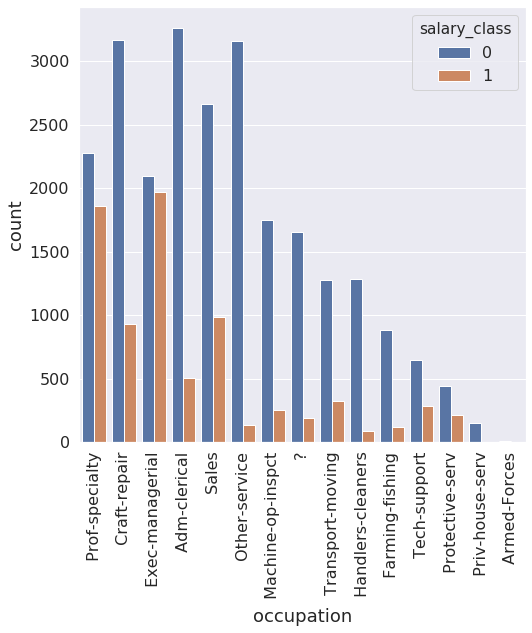

In [39]:
cat_eda(df, "occupation", order=df.occupation.value_counts().index)

# Relationship

In [76]:
col_dict["relationship"] = {"note": "wife & husband vs others", "type": "category"}

In [40]:
df.relationship

0         Not-in-family
1               Husband
2         Not-in-family
3               Husband
4                  Wife
              ...      
32556              Wife
32557           Husband
32558         Unmarried
32559         Own-child
32560              Wife
Name: relationship, Length: 32561, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

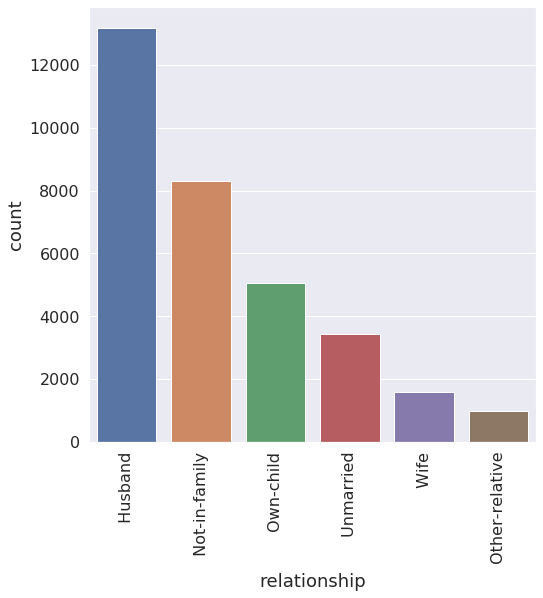

In [41]:
sns.countplot(df.relationship, order=df.relationship.value_counts().index)
plt.xticks(rotation=90)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8124d037d0>,
                  salary_class
 relationship                 
  Wife                0.475128
  Husband             0.448571
  Not-in-family       0.103070
  Unmarried           0.063262
  Other-relative      0.037717
  Own-child           0.013220)

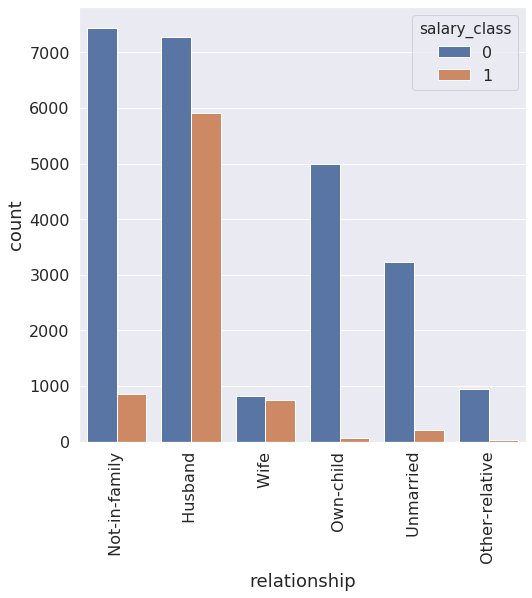

In [42]:
cat_eda(df, "relationship")

# Race

In [43]:
col_dict["race"] = {"type": "category"}

In [44]:
df.race

0         White
1         White
2         White
3         Black
4         Black
          ...  
32556     White
32557     White
32558     White
32559     White
32560     White
Name: race, Length: 32561, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

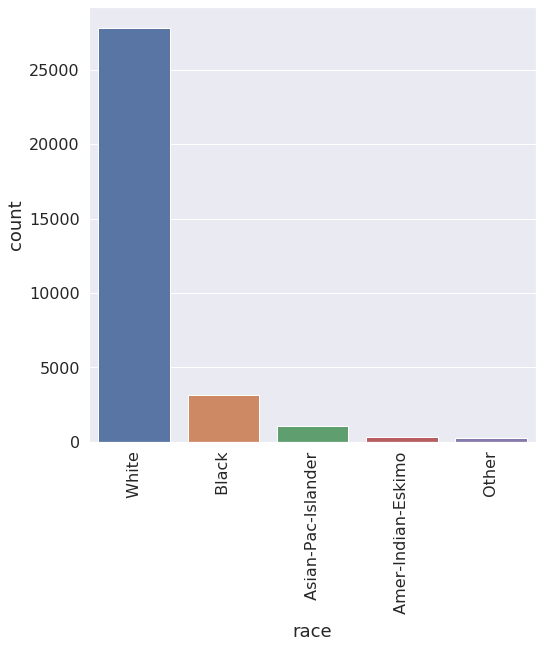

In [45]:
sns.countplot(df.race, order=df.race.value_counts().index)
plt.xticks(rotation=90)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8124be9a90>,
                      salary_class
 race                             
  Asian-Pac-Islander      0.265640
  White                   0.255860
  Black                   0.123880
  Amer-Indian-Eskimo      0.115756
  Other                   0.092251)

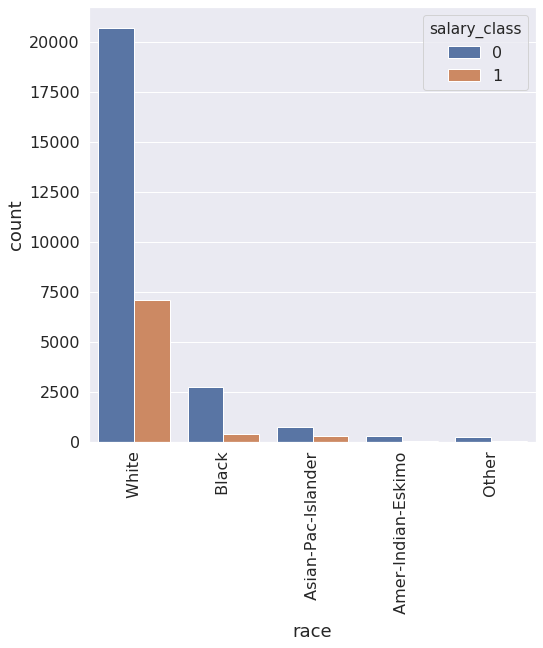

In [46]:
cat_eda(df, "race")

# Sex

In [47]:
col_dict["sex"] = {"type": "category"}

In [48]:
df.sex

0           Male
1           Male
2           Male
3           Male
4         Female
          ...   
32556     Female
32557       Male
32558     Female
32559       Male
32560     Female
Name: sex, Length: 32561, dtype: object

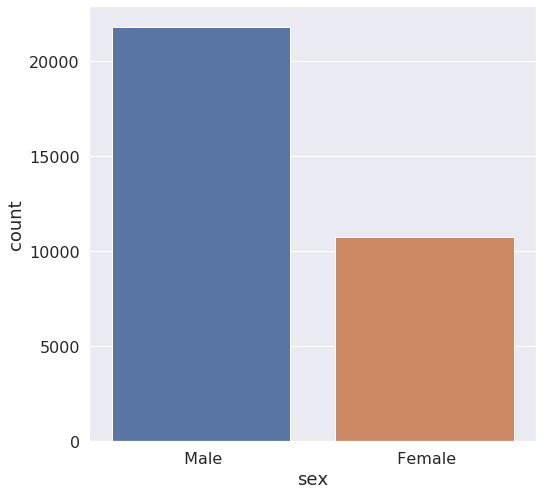

In [49]:
sns.countplot(df.sex)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8124b39190>,
          salary_class
 sex                  
  Male        0.305737
  Female      0.109461)

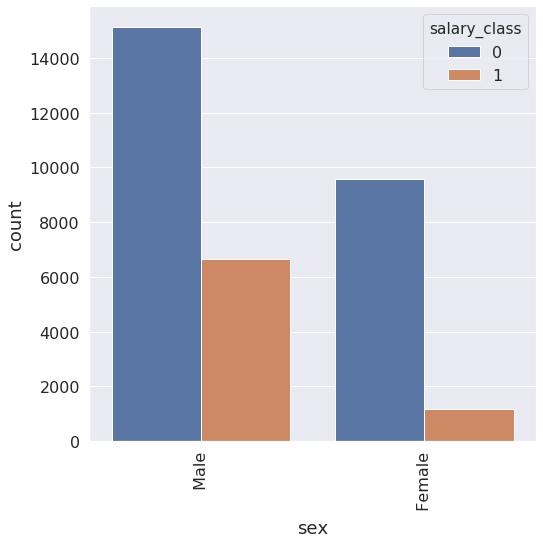

In [50]:
cat_eda(df, "sex")

# Capital Gain and Loss

In [51]:
col_dict["capital_gain"] = {"type": "drop"}
col_dict["capital_loss"] = {"type": "drop"}
col_dict["is_cap"] = {"note": "If capital_gain or capital_loss not 0", "type": int}

In [52]:
cap_df = df[["capital_gain", "capital_loss", "salary_class"]]

In [53]:
(cap_df == 0).sum() / cap_df.shape[0] * 100

capital_gain    91.671017
capital_loss    95.334910
salary_class    75.919044
dtype: float64

In [54]:
is_cap_df = cap_df.copy()
is_cap_df[["capital_gain", "capital_loss"]] = (
    is_cap_df[["capital_gain", "capital_loss"]] != 0
)

              salary_class
capital_gain              
True              0.618363
False             0.206506               salary_class
capital_loss              
True              0.508887
False             0.227692


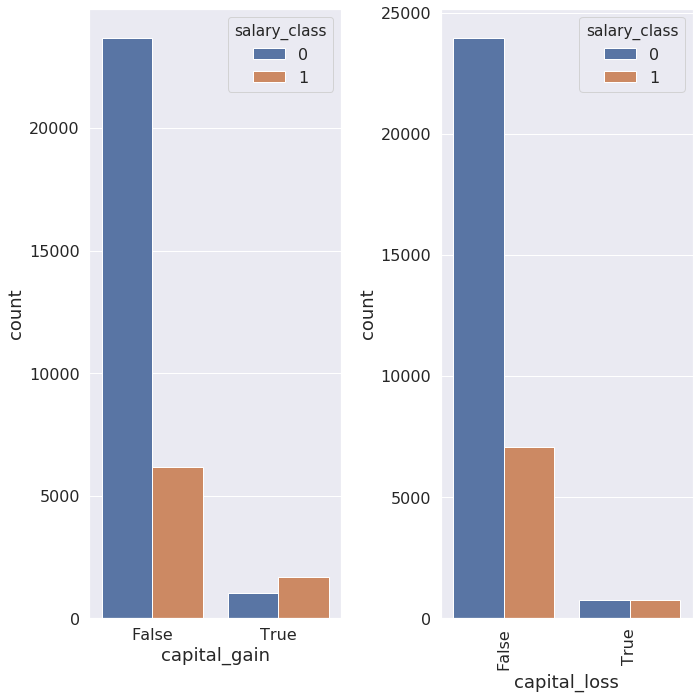

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

ax_gain, gain_perc = cat_eda(is_cap_df, "capital_gain", ax=axes[0])
ax_loss, loss_perc = cat_eda(is_cap_df, "capital_loss", ax=axes[1])

plt.tight_layout()
print(gain_perc, loss_perc)

In [56]:
cap_df[is_cap_df.all(axis=1)]

,capital_gain,capital_loss,salary_class


In [57]:
is_cap = is_cap_df[["capital_gain", "capital_loss"]].any(axis=1)

In [58]:
df["is_cap"] = is_cap

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8124b392d0>,
         salary_class
 is_cap              
 True        0.579059
 False       0.190293)

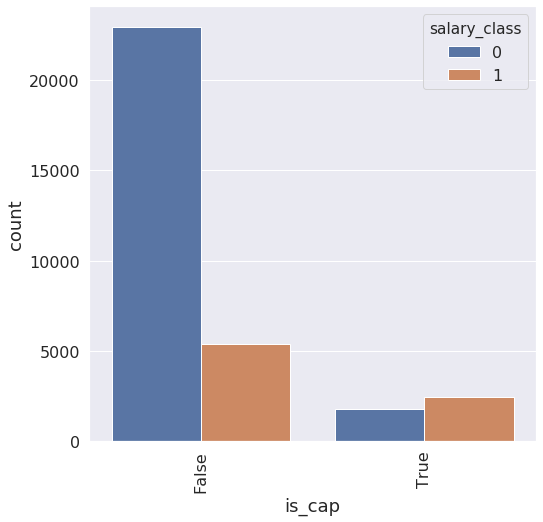

In [59]:
cat_eda(df, "is_cap")

# Hours per week

In [60]:
col_dict["hours_per_week"] = {"type": int}

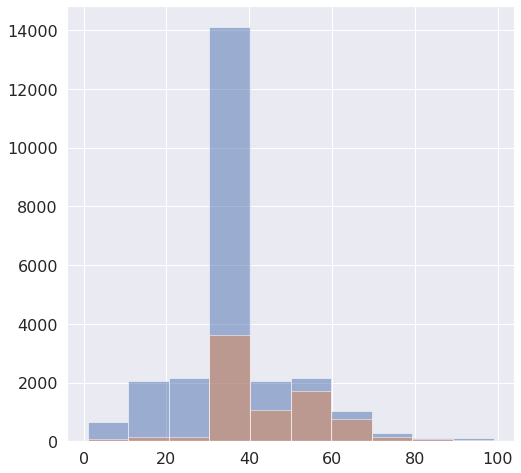

In [61]:
(df.hours_per_week[df.salary_class == 0]).hist(alpha=0.5)
(df.hours_per_week[df.salary_class == 1]).hist(alpha=0.5)

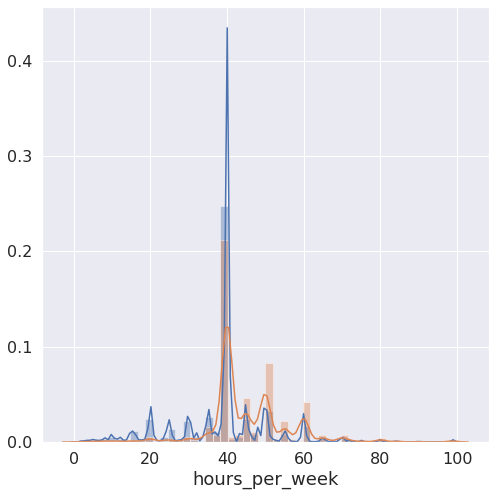

In [62]:
sns.distplot(df.hours_per_week[df.salary_class == 0])
sns.distplot(df.hours_per_week[df.salary_class == 1])

In [63]:
hours_df = df.copy()
hours_df["40"] = hours_df.hours_per_week >= 40

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8124736a90>,
        salary_class
 40                 
 True       0.286434
 False      0.095066)

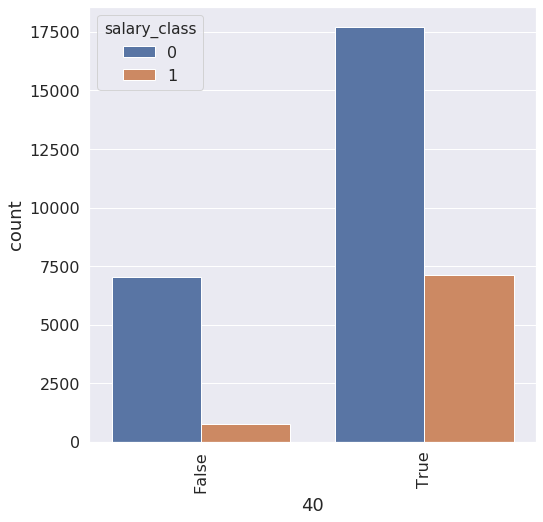

In [64]:
cat_eda(hours_df, "40")

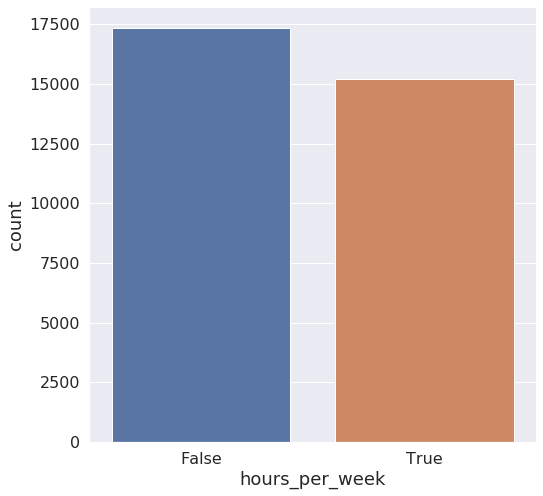

In [65]:
sns.countplot(df.hours_per_week == 40)

# Native Country

In [66]:
col_dict["native_country"] = {"note": "probably doesn't help much", "type": "category"}

In [67]:
df.native_country

0         United-States
1         United-States
2         United-States
3         United-States
4                  Cuba
              ...      
32556     United-States
32557     United-States
32558     United-States
32559     United-States
32560     United-States
Name: native_country, Length: 32561, dtype: object

In [68]:
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f812468e4d0>,
                              salary_class
 native_country                           
  Iran                            0.418605
  France                          0.413793
  India                           0.400000
  Taiwan                          0.392157
  Japan                           0.387097
  Yugoslavia                      0.375000
  Cambodia                        0.368421
  Italy                           0.342466
  England                         0.333333
  Canada                          0.322314
  Germany                         0.321168
  Philippines                     0.308081
  Hong                            0.300000
  Greece                          0.275862
  China                           0.266667
  Cuba                            0.263158
  ?                               0.250429
  Scotland                        0.250000
  United-States                   0.245835
  Hungary                         0.2

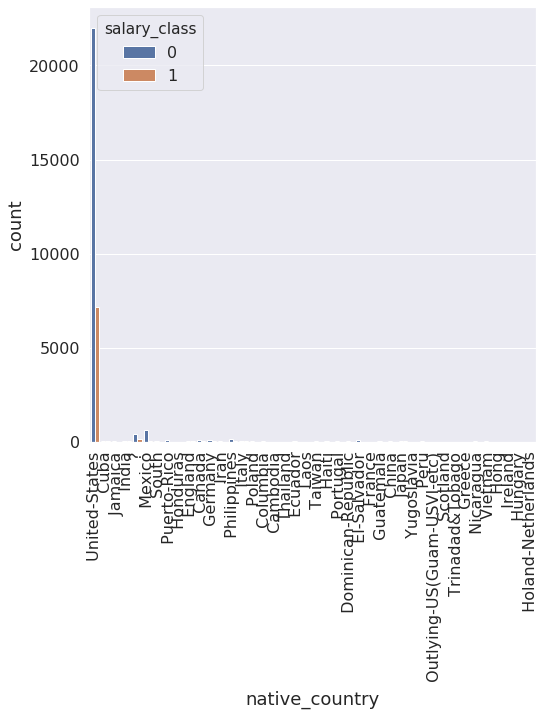

In [69]:
cat_eda(df, "native_country")

In [70]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_class,is_cap
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,False
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,False
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,False
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,False


In [71]:
int_cols = []
cat_cols = []
for col, d in col_dict.items():
    if callable(d["type"]):
        int_cols.append(col)
    elif str(d["type"] == "category"):
        cat_cols.append(col)

In [72]:
int_cols

['salary_class', 'age', 'fnlwgt', 'education_num', 'is_cap', 'hours_per_week']

In [73]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'native_country']

In [75]:
col_dict

{'salary_class': {'notes': '', 'type': int},
 'age': {'notes': 'OK', 'type': int},
 'workclass': {'notes': '70% private, 5.7% unkown(?)', 'type': 'category'},
 'fnlwgt': {'notes': 'Number of people per row? Need to do some more research on this',
  'type': int},
 'education': {'notes': 'This is an ordinal column and the order may be important.',
  'type': 'category'},
 'education_num': {'note': 'Copy of `education`', 'type': int},
 'marital_status': {'note': 'Looks like Married - Not Married will be a good feature. Include Married-spouse-absent in not married',
  'type': 'category'},
 'race': {'type': 'category'},
 'sex': {'type': 'category'},
 'capital_gain': {'type': 'drop'},
 'capital_loss': {'type': 'drop'},
 'is_cap': {'note': 'If capital_gain or capital_loss not 0', 'type': int},
 'hours_per_week': {'type': int},
 'native_country': {'note': "probably doesn't help much", 'type': 'category'}}